In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# source https://colab.research.google.com/github/tensorflow/io/blob/master/docs/tutorials/dicom.ipynb#scrollTo=WodUv8O1VKmr

In [2]:
list(os.listdir("../input/rsna-str-pulmonary-embolism-detection"))

['sample_submission.csv', 'test', 'train', 'test.csv', 'train.csv']

In [3]:
%%time
DATA_PATH = "../input/rsna-str-pulmonary-embolism-detection"

train = pd.read_csv(f"{DATA_PATH}/train.csv")
test = pd.read_csv(f"{DATA_PATH}/test.csv")
sample_submission = pd.read_csv(f"{DATA_PATH}/sample_submission.csv")

CPU times: user 2.85 s, sys: 488 ms, total: 3.33 s
Wall time: 3.36 s


In [4]:
train.head(10)

,StudyInstanceUID,SeriesInstanceUID,SOPInstanceUID,pe_present_on_image,negative_exam_for_pe,qa_motion,qa_contrast,flow_artifact,rv_lv_ratio_gte_1,rv_lv_ratio_lt_1,leftsided_pe,chronic_pe,true_filling_defect_not_pe,rightsided_pe,acute_and_chronic_pe,central_pe,indeterminate
0,6897fa9de148,2bfbb7fd2e8b,c0f3cb036d06,0,0,0,0,0,0,1,1,0,0,1,0,0,0
1,6897fa9de148,2bfbb7fd2e8b,f57ffd3883b6,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,6897fa9de148,2bfbb7fd2e8b,41220fda34a3,0,0,0,0,0,0,1,1,0,0,1,0,0,0
3,6897fa9de148,2bfbb7fd2e8b,13b685b4b14f,0,0,0,0,0,0,1,1,0,0,1,0,0,0
4,6897fa9de148,2bfbb7fd2e8b,be0b7524ffb4,0,0,0,0,0,0,1,1,0,0,1,0,0,0
5,6897fa9de148,2bfbb7fd2e8b,c7b99cb454d4,0,0,0,0,0,0,1,1,0,0,1,0,0,0
6,6897fa9de148,2bfbb7fd2e8b,e153deb813ed,0,0,0,0,0,0,1,1,0,0,1,0,0,0
7,6897fa9de148,2bfbb7fd2e8b,c6bbe08f2736,0,0,0,0,0,0,1,1,0,0,1,0,0,0
8,6897fa9de148,2bfbb7fd2e8b,09886998dc28,0,0,0,0,0,0,1,1,0,0,1,0,0,0
9,6897fa9de148,2bfbb7fd2e8b,5b5226ac7bac,0,0,0,0,0,0,1,1,0,0,1,0,0,0


In [5]:
!ls /kaggle/input/rsna-str-pulmonary-embolism-detection/train/6897fa9de148/2bfbb7fd2e8b

031618cba689.dcm  487d9ab5531f.dcm  8ecdaefbe277.dcm  c89fbed94e97.dcm
04cb74d5008c.dcm  4c56afef1910.dcm  925fa5a0923e.dcm  c9dfdd668a12.dcm
09886998dc28.dcm  4f03aef72206.dcm  945e7e32955c.dcm  cef0f36a062e.dcm
09bfdbc349e5.dcm  4fab8823ee67.dcm  947f931d8855.dcm  d10f967890c7.dcm
0de5072ee990.dcm  510d381a11c7.dcm  965e94785415.dcm  d2253e773f05.dcm
11449e662c07.dcm  52b6b0b793bb.dcm  9a83c7356ba8.dcm  d62e15417d41.dcm
13b685b4b14f.dcm  53d9f36c01c3.dcm  9a9750e671c2.dcm  d78e1203fde1.dcm
148dfe893a66.dcm  559ac3d40184.dcm  9b599fd58996.dcm  d9a42da6c36f.dcm
1997c99c9d59.dcm  57b52d5494a3.dcm  9c2cdfff8abc.dcm  d9d5081f6ee8.dcm
1f108fe8cae4.dcm  5b5226ac7bac.dcm  9e00c172291d.dcm  d9e3d9934410.dcm
1f1a8108891c.dcm  5b8e6d8c26e6.dcm  9e712b4d09a4.dcm  da97c4b2cc9c.dcm
1fa18364e089.dcm  5edaf0e45844.dcm  a098c6594df8.dcm  db937353ea10.dcm
21c2645ae16d.dcm  5fe975eb5ce9.dcm  a787ce664744.dcm  dcc081dc712d.dcm
222f0e7e64af.dcm  622e6f6ec380.dcm  ab994ef19adb.dcm  ddfbf82a1fa0.dcm
22e53d

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790594 entries, 0 to 1790593
Data columns (total 17 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   StudyInstanceUID            object
 1   SeriesInstanceUID           object
 2   SOPInstanceUID              object
 3   pe_present_on_image         int64 
 4   negative_exam_for_pe        int64 
 5   qa_motion                   int64 
 6   qa_contrast                 int64 
 7   flow_artifact               int64 
 8   rv_lv_ratio_gte_1           int64 
 9   rv_lv_ratio_lt_1            int64 
 10  leftsided_pe                int64 
 11  chronic_pe                  int64 
 12  true_filling_defect_not_pe  int64 
 13  rightsided_pe               int64 
 14  acute_and_chronic_pe        int64 
 15  central_pe                  int64 
 16  indeterminate               int64 
dtypes: int64(14), object(3)
memory usage: 232.2+ MB


In [7]:
# %%time
# files = folders = 0

# for _, dirnames, filenames in os.walk(f"{DATA_PATH}/train"):
#     files += len(filenames)
#     folders += len(dirnames)
# print("Total number of folders in train:{} and files in it:{}".format(folders,files))

Total number of folders in train:14558 and files in it:1790594  
CPU times: user 4.38 s, sys: 10.7 s, total: 15.1 s  
Wall time: 3min 37s  

In [8]:
# len(train.StudyInstanceUID.unique()),len(train.SeriesInstanceUID.unique()),len(train.SOPInstanceUID.unique())
# (7279, 7279, 1790594)

In [9]:
!pip install tensorflow-io

     |████████████████████████████████| 22.3 MB 111 kB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [10]:
import tensorflow as tf
import tensorflow_io as tfio
from pathlib import Path
import matplotlib.pyplot as plt

In [11]:
DATA_PATH = Path(DATA_PATH)

In [12]:
image_bytes = tf.io.read_file('/kaggle/input/rsna-str-pulmonary-embolism-detection/train/6897fa9de148/2bfbb7fd2e8b/031618cba689.dcm')

In [13]:
image       = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)
skipped     = tfio.image.decode_dicom_image(image_bytes, on_error='skip', dtype=tf.uint8)
lossy_image = tfio.image.decode_dicom_image(image_bytes, scale='auto', on_error='lossy', dtype=tf.uint8)

In [14]:
type(skipped), type(skipped.numpy()), skipped.numpy() 

(tensorflow.python.framework.ops.EagerTensor,
 numpy.ndarray,
 array([], dtype=uint8))

In [15]:
image.numpy().shape, lossy_image.numpy().shape

((1, 512, 512, 1), (1, 512, 512, 1))

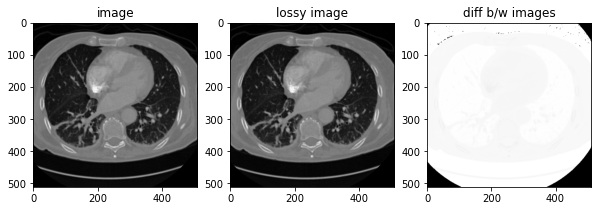

In [16]:
fig, axes = plt.subplots(1,3, figsize=(10,10))

axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');
axes[2].imshow(np.squeeze(lossy_image.numpy() - image.numpy()), cmap='gray')
axes[2].set_title('diff b/w images');

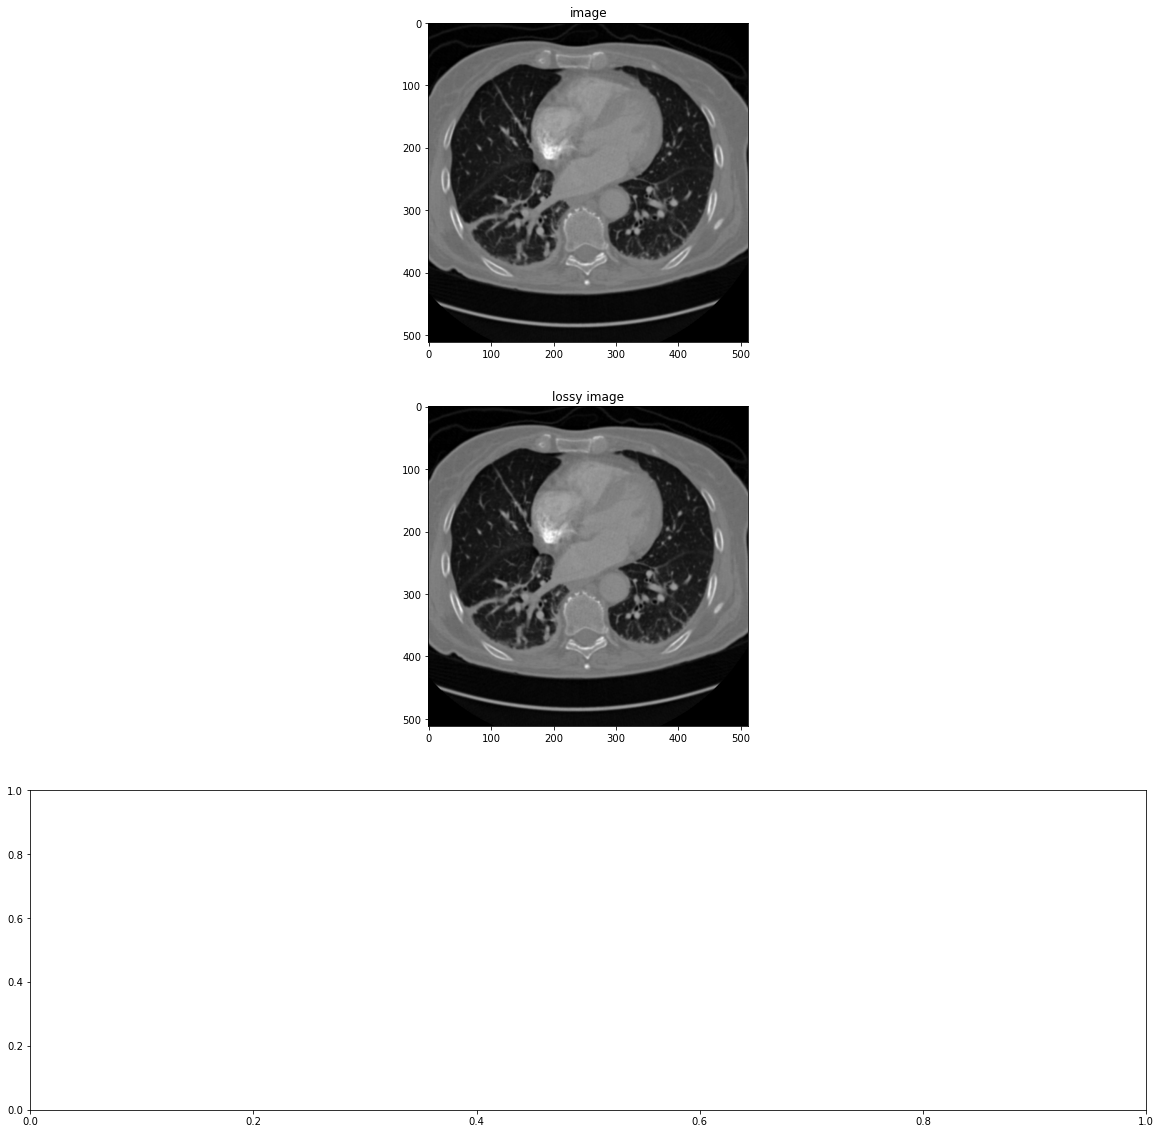

In [17]:
fig, axes = plt.subplots(3,1, figsize=(20,20))

axes[0].imshow(np.squeeze(image.numpy()), cmap='gray')
axes[0].set_title('image')
axes[1].imshow(np.squeeze(lossy_image.numpy()), cmap='gray')
axes[1].set_title('lossy image');

In [18]:
np.sum(image.numpy() - lossy_image.numpy())

305548211

## if you found this beneficial please consider upvoting